In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Carrega les dades
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalització de les dades
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Codificació One-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Definir la mida del batch i el número d'èpoques
batch_size = 32
epochs = 10

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.3195 - loss: 1.8283 - val_accuracy: 0.5454 - val_loss: 1.2741
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5474 - loss: 1.2733 - val_accuracy: 0.6155 - val_loss: 1.0907
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.6245 - loss: 1.0706 - val_accuracy: 0.6688 - val_loss: 0.9498
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6688 - loss: 0.9555 - val_accuracy: 0.6851 - val_loss: 0.9058
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7014 - loss: 0.8608 - val_accuracy: 0.7006 - val_loss: 0.8669
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7299 - loss: 0.7781 - val_accuracy: 0.7205 - val_loss: 0.8158
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.7470 - loss: 0.7296 - val_accuracy: 0.7169 - val_loss: 0.8194
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7645 -

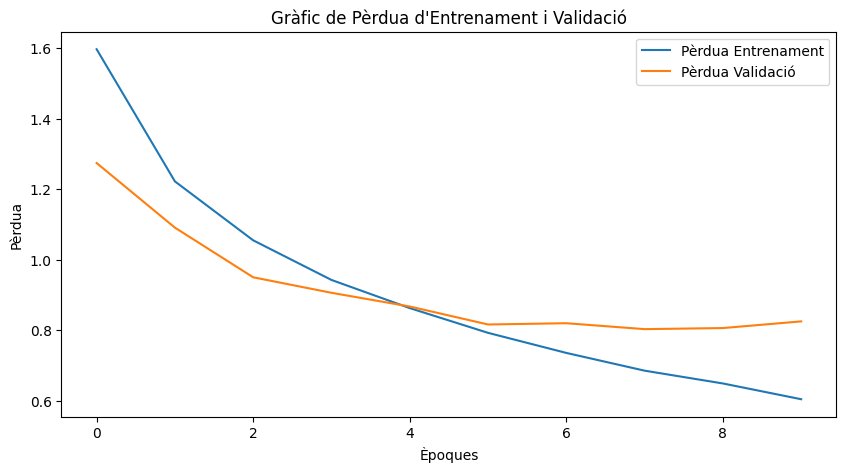

In [20]:
import matplotlib.pyplot as plt


def plot_training_validation_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Pèrdua Entrenament')
    plt.plot(history.history['val_loss'], label='Pèrdua Validació')
    plt.title('Gràfic de Pèrdua d\'Entrenament i Validació')
    plt.ylabel('Pèrdua')
    plt.xlabel('Èpoques')
    plt.legend()
    plt.show()

# Suposant que `history` és el retorn de model.fit() de TensorFlow
plot_training_validation_loss(history)

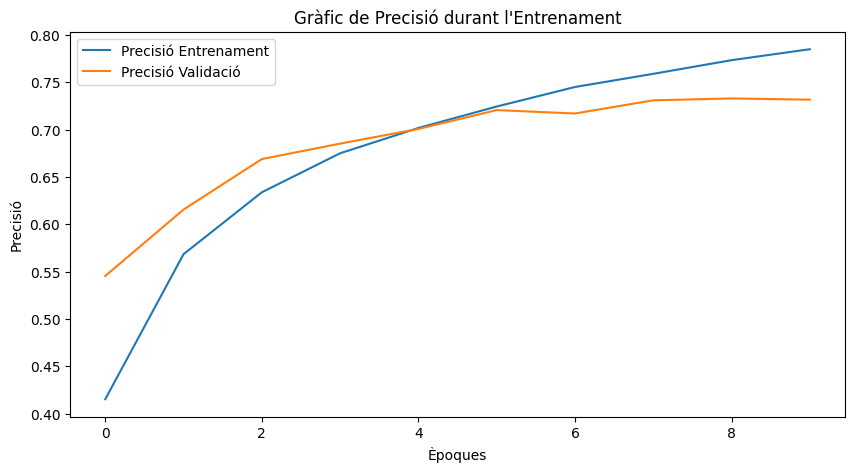

In [21]:
def plot_accuracy(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Precisió Entrenament')
    plt.plot(history.history['val_accuracy'], label='Precisió Validació')
    plt.title('Gràfic de Precisió durant l\'Entrenament')
    plt.ylabel('Precisió')
    plt.xlabel('Èpoques')
    plt.legend()
    plt.show()

plot_accuracy(history)

In [24]:
from tensorflow.keras.models import Sequential, Model

In [25]:
def visualize_activations(model, input_image):
    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(np.expand_dims(input_image, axis=0))
    
    layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]
    
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        
        plt.figure(figsize=(n_features * 0.5, n_features * 0.5))
        plt.suptitle(layer_name)
        
        for i in range(n_features):
            plt.subplot(size, size, i + 1)
            plt.imshow(layer_activation[0, :, :, i], aspect='auto', cmap='viridis')
            plt.axis('off')
        plt.show()

# Suposa que tens una imatge `input_image` preprocessada i un model `model` carregat.
visualize_activations(model, input_image)


ValueError: The layer sequential_2 has never been called and thus has no defined input.

In [26]:
# Selecciona una imatge aleatòria del conjunt de test per visualitzar les activacions
input_image = x_test[0]

# Visualitza les activacions per la imatge seleccionada
visualize_activations(model, input_image)

ValueError: The layer sequential_2 has never been called and thus has no defined input.

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import datetime
import os

In [31]:
# Carrega les dades
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalització de les dades
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Codificació One-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Definir la mida del batch i el número d'èpoques
batch_size = 64
epochs = 10


In [32]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.3055 - loss: 1.8590 - val_accuracy: 0.5311 - val_loss: 1.2781
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.5281 - loss: 1.3193 - val_accuracy: 0.6109 - val_loss: 1.0881
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.5961 - loss: 1.1473 - val_accuracy: 0.6266 - val_loss: 1.0274
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.6391 - loss: 1.0344 - val_accuracy: 0.6679 - val_loss: 0.9433
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6782 - loss: 0.9300 - val_accuracy: 0.6911 - val_loss: 0.8702
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6925 - loss: 0.8761 - val_accuracy: 0.6908 - val_loss: 0.8835
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 31ms/step - accuracy: 0.7149 - loss: 0.8140 - val_accuracy: 0.7107 - val_loss: 0.8316
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7383 - loss: 0.7515 - 

In [35]:
def visualize_activations(model, input_image):
    layer_outputs = [
        layer.output for layer in model.layers if 'conv' in layer.name]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(np.expand_dims(input_image, axis=0))

    layer_names = [
        layer.name for layer in model.layers if 'conv' in layer.name]

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = int(np.ceil(np.sqrt(n_features)))

        plt.figure(figsize=(size, size))
        plt.suptitle(layer_name)

        for i in range(n_features):
            plt.subplot(size, size, i + 1)
            plt.imshow(layer_activation[0, :, :, i],
                       aspect='auto', cmap='viridis')
            plt.axis('off')
        plt.show()

In [37]:
# Assegura que el model s'ha invocat amb una entrada
_ = model.predict(x_train[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [38]:
def visualize_activations(model, input_image):
    layer_outputs = [
        layer.output for layer in model.layers if 'conv' in layer.name]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(np.expand_dims(input_image, axis=0))

    layer_names = [
        layer.name for layer in model.layers if 'conv' in layer.name]

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = int(np.ceil(np.sqrt(n_features)))

        plt.figure(figsize=(size * 2, size * 2))
        plt.suptitle(layer_name)

        for i in range(n_features):
            plt.subplot(size, size, i + 1)
            plt.imshow(layer_activation[0, :, :, i],
                       aspect='auto', cmap='viridis')
            plt.axis('off')
        plt.show()


# Suposa que tens una imatge `input_image` preprocessada
visualize_activations(model, x_train[0])

ValueError: The layer sequential_4 has never been called and thus has no defined input.